<a href="https://colab.research.google.com/github/fire-long/24-1AI-ML/blob/main/W6%26W7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 4.1 선형 회귀

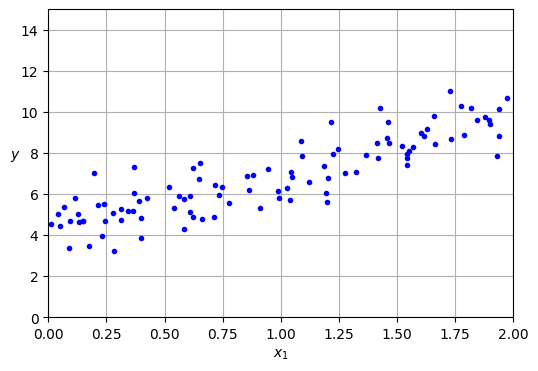

In [1]:
import numpy as np

np.random.seed(42)#동일 재현을 위해 지정
m = 100 #샘플 개수
X = 2*np.random.rand(m, 1) #열 벡터
y = 4 + 3 * X + np.random.randn(m, 1) #열 벡터

#그림 4-1
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation = 0)
plt.axis([0, 2, 0, 15])
plt.grid()
plt.show()

In [2]:
from sklearn.preprocessing import add_dummy_feature

X_b = add_dummy_feature(X) #각 샘플에 x0=1을 추가함
theta_best = np.linalg.inv(X_b.T@X_b)@X_b.T@y
theta_best

array([[4.21509616],
       [2.77011339]])

In [5]:
X_new = np.array([[0], [2]])
X_new_b = add_dummy_feature(X_new) #각 샘플에 x0=1을 추가
y_predict = X_new_b @ theta_best
y_predict

array([[4.21509616],
       [9.75532293]])

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


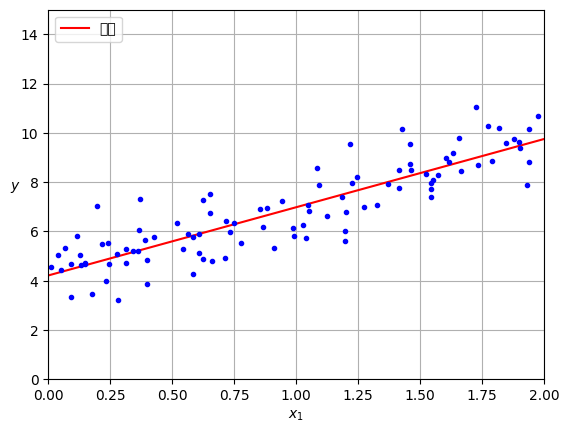

In [6]:
import matplotlib.pyplot as plt

plt.plot(X_new, y_predict, "r-", label="예측")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()
plt.legend(loc="upper left")
plt.show()

In [9]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [11]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.21509616],
       [2.77011339]])

In [10]:
np.linalg.pinv(X_b)@y

array([[4.21509616],
       [2.77011339]])

# 4.2 경사하강법

In [12]:
eta = 0.1 #학습률
n_epochs = 1000
m = len(X_b) #샘플 개수

np.random.seed(42)
theta = np.random.randn(2, 1) #모델 파라미터를 랜덤하게 초기화함

for epoch in range(n_epochs):
  gradients = 2/m * X_b.T @ (X_b@theta-y)
  theta = theta - eta * gradients

In [13]:
theta

array([[4.21509616],
       [2.77011339]])

In [14]:
#학습 스케줄을 사용한 확률적 경사 학아법의 구현
n_epochs = 50
t0, t1 = 5, 50 #학습 스케줄 하이퍼파라미터
def learning_schedule(t):
  return t0/(t+t1)
np.random.seed(42)
theta = np.random.randn(2, 1) #랜덤 초기화

for epoch in range(n_epochs):
  for iteration in range(m):
    random_index = np.random.randint(m)
    xi = X_b[random_index:random_index+1]
    yi = y[random_index:random_index+1]
    gradients = 2 * xi.T @ (xi@theta - yi) #SGD의 경우 m으로 나누지 않음
    eta = learning_schedule(epoch * m + iteration)
    theta = theta - eta * gradients
theta

array([[4.21076011],
       [2.74856079]])

In [16]:
#SGD Regresssor class
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter = 1000, tol = 1e-5, penalty=None, eta0=0.01, n_iter_no_change=100, random_state=42)
sgd_reg.fit(X, y.ravel())#fit()이 1D 타깃을 기대하므로 y.ravel()로 씀
sgd_reg.intercept_, sgd_reg.coef_

(array([4.21278812]), array([2.77270267]))

# 4.3 다항회귀